In [1]:
import statsmodels.api as sm 
import sqlite3
import pickle
import codecs
import otree
import binascii
import os,sys
import math
module_path = os.path.abspath(os.path.join('../../otree-survey/gwb-survey_court/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from otree import settings

In [2]:
import pandas as pd
from ydata_profiling import ProfileReport

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline
from sklearn.linear_model import LinearRegression
import logging
import seaborn as sns
from data_analysis import OtreeCleaning

/Users/olivierkamoun/envs/tau_thesis_tools/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
figs_folder="/Users/olivierkamoun/Library/Mobile Documents/com~apple~CloudDocs/study/TAU_cyber/thesis/figs/ult_"
def save_plot(name_plot,aplot=plt):
    aplot.savefig(figs_folder+name_plot+'.png', format="png", bbox_inches="tight")

# General settings

In [4]:
sns.set(style="whitegrid")

In [5]:
default_temo = 0.7

## tools

In [6]:
def clean_to_str(c):

    if isinstance(c,str) or pd.isna(c):
        return c
    else :
        return str(int(c))

#  load data

### load from database bot results

In [7]:
sql_string = "/Users/olivierkamoun/PycharmProjects/otree-survey/gwb-survey_court/db.sqlite3"
data_folder = "/Users/olivierkamoun/PycharmProjects/tau_thesis_tools/ultimatum/data/98ro6ly1/"

### Define list of sessions to analyse

In [8]:


sessions_dict= {"98ro6ly1":""}

sessions= list(sessions_dict.keys())
otc=OtreeCleaning(session_configs=sessions,sql_string=sql_string , folder = data_folder)

In [9]:
sessions_df,df =otc.load_from_folders()
print(f' loaded {len(df)} run for {len(sessions_df)} sessions ')

 loaded 100 run for 1 sessions 


In [10]:
split_cols = [c for c in df.columns if 'split' in c]
ulti_cols = [c for c in df.columns if 'ulti' in c]

In [11]:
data_gr= df[~pd.isna(df['ultimatum.5.group.split_amount'])][split_cols]

In [12]:
data_gr.columns=["round 1"]+["round "+c.split('.')[1] for c in split_cols[1:]]

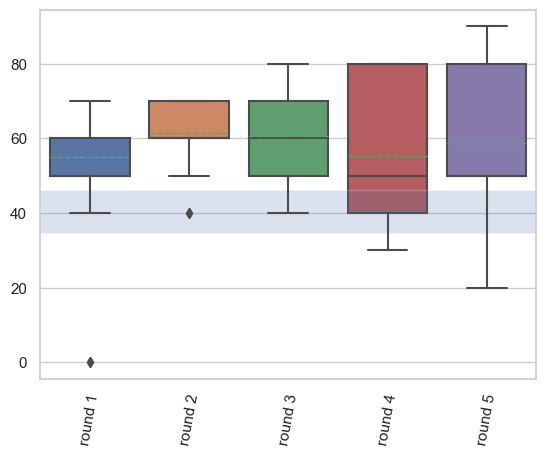

In [13]:
sns.boxplot(data_gr,showmeans=True,meanline=True)
plt.xticks(rotation=80)
plt.fill_between(x=[-0.5,4.5],y1=40.41-5.85,y2=40.41+5.85,alpha=.2)
plt.savefig(figs_folder+"proposed.png", format="png", bbox_inches="tight")

<Axes: >

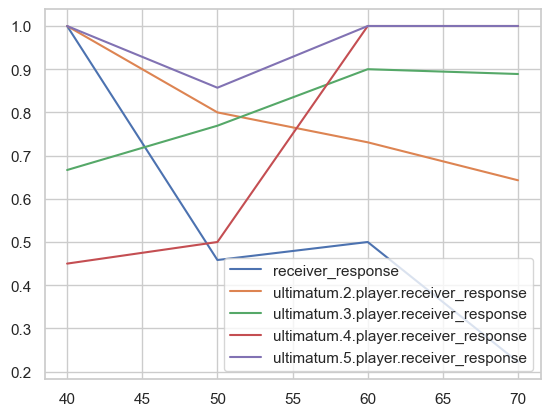

In [14]:
res=dict()
for i in range(1,6):
    if i>1 :
        spc= 'ultimatum.'+str(i)+'.group.split_amount'
        recc = 'ultimatum.'+str(i)+'.player.receiver_response'
    else :
        spc= 'split_amount'
        recc ='receiver_response'
    tmpres=  df[df['ultimatum.2.player.id_in_group']==2][[spc,recc]].groupby([spc]).mean().to_dict()
    res.update(tmpres)
    
    
pd.DataFrame.from_dict(res).sort_index().dropna().plot()

In [15]:
    
pd.DataFrame.from_dict(res)

,receiver_response,ultimatum.2.player.receiver_response,ultimatum.3.player.receiver_response,ultimatum.4.player.receiver_response,ultimatum.5.player.receiver_response
0.0,0.000000,NaN,NaN,NaN,NaN
40.0,1.000000,1.000000,0.666667,0.45,1.000000
50.0,0.458333,0.800000,0.769231,0.50,0.857143
60.0,0.500000,0.730769,0.900000,1.00,1.000000
65.0,1.000000,NaN,NaN,NaN,1.000000
70.0,0.222222,0.642857,0.888889,1.00,1.000000
80.0,NaN,NaN,1.000000,0.75,1.000000
30.0,NaN,NaN,NaN,0.00,0.200000
55.0,NaN,NaN,NaN,0.75,NaN
20.0,NaN,NaN,NaN,NaN,1.000000


<Axes: xlabel='split'>

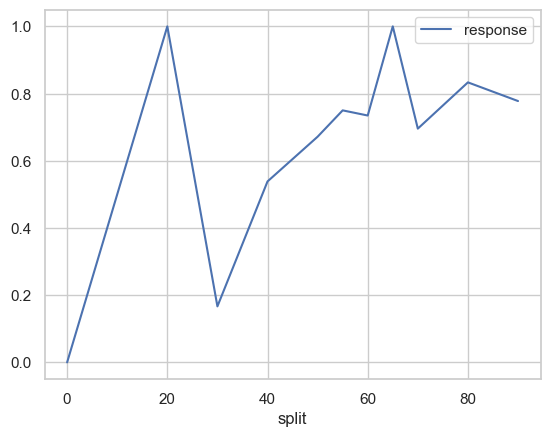

In [16]:
full_d=pd.DataFrame()
for i in range(1,6):
    if i>1 :
        spc= 'ultimatum.'+str(i)+'.group.split_amount'
        recc = 'ultimatum.'+str(i)+'.player.receiver_response'
    else :
        spc= 'split_amount'
        recc ='receiver_response'
    tmpd= df[df['ultimatum.2.player.id_in_group']==2][[spc,recc]]
    tmpd.columns=['split','response']
    full_d=pd.concat([full_d,tmpd])
    
full_d.groupby('split').mean().plot()


In [17]:
full_d['reject']=100*(1-full_d['response'])

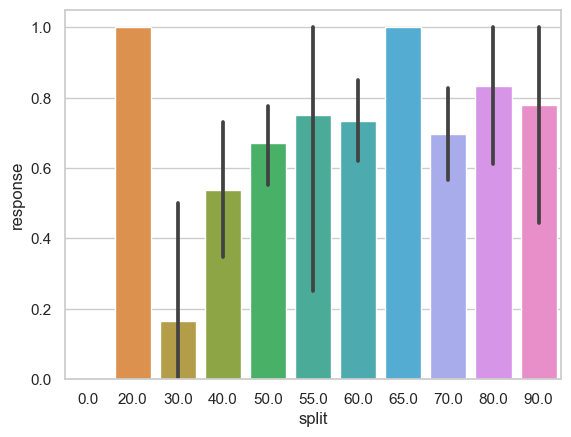

In [18]:
sns.barplot(data=full_d,x='split',y='response')

save_plot('acceptance_by_split_amount',plt)
plt.show()

df[[c for c in df.columns if 'group.id' in c]][[c for c in df.columns if 'ulti' in c]]

In [19]:
rec_cols = [c for c in df.columns if 'receiver' in c]
rec_cols

['receiver_response',
 'ultimatum.2.player.receiver_response',
 'ultimatum.3.player.receiver_response',
 'ultimatum.4.player.receiver_response',
 'ultimatum.5.player.receiver_response']

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'split_amount'),
  Text(2, 0, 'ultimatum.2.group.split_amount'),
  Text(3, 0, 'ultimatum.3.group.split_amount'),
  Text(4, 0, 'ultimatum.4.group.split_amount'),
  Text(5, 0, 'ultimatum.5.group.split_amount')])

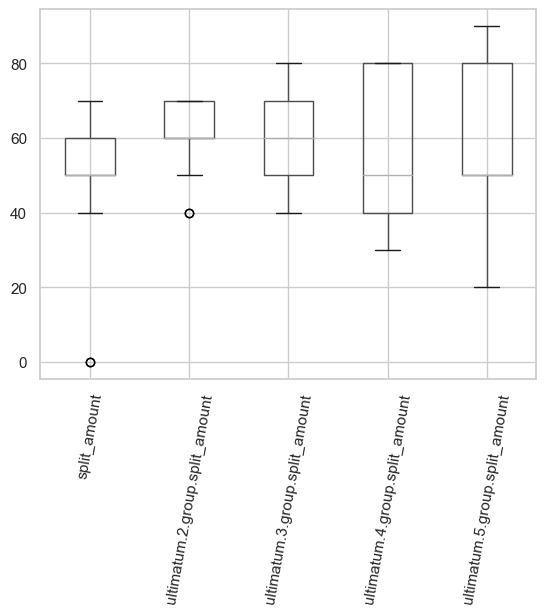

In [20]:
df[~pd.isna(df['ultimatum.5.group.split_amount'])][split_cols].boxplot()
plt.xticks(rotation=80)

In [21]:
df.columns

Index(['id_in_session', 'code', 'label', '_is_bot', '_index_in_pages',
       '_max_page_index', '_current_app_name', '_current_page_name',
       'time_started_utc', 'visited',
       ...
       'us_reform.1.player.court_interest',
       'us_reform.1.player.court_interst_since',
       'us_reform.1.player.next_election', 'change_term',
       'us_reform.1.player.change_selection', 'change_size',
       'us_reform.1.player.court_decision',
       'us_reform.1.player.pages_excluded',
       'us_reform.1.group.id_in_subsession',
       'us_reform.1.subsession.round_number'],
      dtype='object', length=2505)

In [22]:
item_col=list(df.columns)
len(item_col)

2505

In [23]:
df[[split_cols[0],rec_cols[0]]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
split_amount,96.0,55.312500,11.489412,0.0,50.0,50.0,60.0,70.0
receiver_response,46.0,0.434783,0.501206,0.0,0.0,0.0,1.0,1.0


In [24]:
df[df['id_in_group']==2][[split_cols[0],rec_cols[0]]].describe()

,split_amount,receiver_response
count,48.000000,46.000000
mean,55.312500,0.434783
std,11.550364,0.501206
min,0.000000,0.000000
25%,50.000000,0.000000
50%,50.000000,0.000000
75%,60.000000,1.000000
max,70.000000,1.000000


In [25]:
df[df['id_in_group']==2][[split_cols[1],rec_cols[1]]].describe()

,ultimatum.2.group.split_amount,ultimatum.2.player.receiver_response
count,46.000000,46.000000
mean,61.521739,0.717391
std,6.981688,0.455243
min,40.000000,0.000000
25%,60.000000,0.000000
50%,60.000000,1.000000
75%,70.000000,1.000000
max,70.000000,1.000000


In [26]:
def nice_session_label(s):
    if s in sessions_dict :
        if '_' in sessions_dict[s]:
            return ' '.join(sessions_dict[s].split('_')[1:])
        else :
            return sessions_dict[s]
    return s


In [27]:
data_gr

,round 1,round 2,round 3,round 4,round 5
2,50.0,60.0,40.0,70.0,50.0
3,50.0,60.0,40.0,70.0,50.0
4,70.0,60.0,80.0,50.0,70.0
5,70.0,60.0,80.0,50.0,70.0
6,50.0,60.0,70.0,80.0,90.0
...,...,...,...,...,...
95,50.0,70.0,60.0,40.0,50.0
96,50.0,60.0,70.0,80.0,90.0
97,50.0,60.0,70.0,80.0,90.0
98,70.0,60.0,50.0,40.0,30.0


In [28]:
full_d.describe()

,split,response,reject
count,232.000000,230.000000,230.000000
mean,58.340517,0.682609,31.739130
std,14.284690,0.466476,46.647631
min,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.000000
50%,60.000000,1.000000,0.000000
75%,70.000000,1.000000,100.000000
max,90.000000,1.000000,100.000000


In [29]:
full_d

,split,response,reject
1,60.0,NaN,NaN
3,50.0,1.0,0.0
5,70.0,0.0,100.0
7,50.0,0.0,100.0
9,60.0,1.0,0.0
...,...,...,...
91,40.0,1.0,0.0
93,50.0,1.0,0.0
95,50.0,1.0,0.0
97,90.0,1.0,0.0


## Load original data

In [30]:
file_ref_profile=None

In [31]:
#get profile file per session
sessions_df['profile_file']=[ c.get('profile_file',file_ref_profile) for c in sessions_df['config_dict']]


KeyError: 'config_dict'

In [ ]:
session_participant_dict={}
case_id_list=[]
distinct_original={}
for s in sessions_df.index:
    fn =  sessions_df.loc[s]['profile_file']
    ref_profile_df=pd.read_csv(fn)
    ref_profile_df['age']=2020-ref_profile_df['birthyr']
    p_list= df[df['session.code']==s][['code_2','id_in_session'] ].to_dict(orient='index')
    c_list = ref_profile_df['caseid'][:len(p_list)]
    s_dict={p['code_2']:ref_profile_df['caseid'][p['id_in_session']-1]  for i,p in p_list.items()}
    session_participant_dict[s]=s_dict
    case_id_list = case_id_list + list(c_list)
    name = f'original {len(c_list)}'
    k= fn+name 
    if k not in distinct_original :
        distinct_original[k]={'len':len(c_list),'name':name,'caseis_list':list(c_list) }
        print (distinct_original[k])

        

{'len': 500, 'name': 'original 500', 'caseis_list': [1032326091, 1030827483, 1039977991, 1032308637, 1031879237, 1030417127, 1037784917, 1029951241, 1041003959, 1037672619, 1030205683, 1041006215, 1037446177, 1036448329, 1039357173, 1031568835, 1036726049, 1038581481, 1028831691, 1031929901, 1031327491, 1033707299, 1038030043, 1033981091, 1041007253, 1044119551, 1030536363, 1039978277, 1030537507, 1035342335, 1030954519, 1030716477, 1031812799, 1031135725, 1030096585, 1041014977, 1041015677, 1037126459, 1037329677, 1037446463, 1030506599, 1037328839, 1031410283, 1039978109, 1030960163, 1031063343, 1037302877, 1030537039, 1041006203, 1034921987, 1037192327, 1034231051, 1036985463, 1039977505, 1028885225, 1028316861, 1031428179, 1030565357, 1030562415, 1039978417, 1031073143, 1031633631, 1037384055, 1039134459, 1030460815, 1030620471, 1037693569, 1029175781, 1030180757, 1033219873, 1031331961, 1028565561, 1036274011, 1044118783, 1031758615, 1031386723, 1031623167, 1041015261, 1031132459,

In [ ]:
file_raw_original="/Users/olivierkamoun/PycharmProjects/tau_thesis_tools/us_court_survey/CCES19_IUA_OUTPUT.xlsx"
raw_original_df=pd.read_excel(file_raw_original)
raw_original_df['age']=2020-raw_original_df['birthyr']
distinct_original['original']={'len':len(raw_original_df),'name':'original','caseis_list':list(raw_original_df['caseid']) }

In [ ]:
raw_original_df_selected=raw_original_df.set_index('caseid').loc[case_id_list].reset_index()

In [ ]:

match_columns_file="/Users/olivierkamoun/PycharmProjects/tau_thesis_tools/us_court_survey/match_columns.csv"
match_columns_df=pd.read_csv(match_columns_file)
match_columns_dict=match_columns_df.set_index('col_ref').to_dict(orient='index')


In [ ]:
match_columns_dict={k : match_columns_dict for k in {'age', 'religpew', 'CC19_313', 'gender', 'educ'}}

### Reform original data into new bot format

<Axes: xlabel='_session_code'>

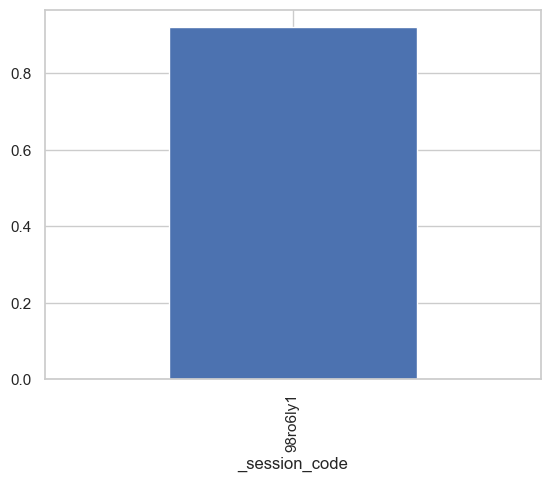

In [ ]:
sum_mean=df.groupby("_session_code").mean(numeric_only=True).sort_values('_created')
sum_mean['full'].plot.bar()

In [ ]:
df

NameError: name 'df' is not defined

## analysis all variables 

In [ ]:

    for c in item_col_cat:
        try:
            tab_nb= pd.crosstab(index=all_app['session.code'],columns=all_app[c],normalize='index')
            min_set = min([len(set([i for i in l if i!=0])) for i,l in tab_nb.iterrows()])
            if min_set<2 or min_set>20 or len(tab_nb.columns)>20:
                print(f'not drawing for  col {c}')
            else :
                print(f'not drawing for  col {c} {len(tab_nb)} {len(tab_nb.columns)} {min_set}')
                tab_nb.plot.bar(stacked=True)
                plt.show()
        except Exception as e:
            print(f'cannot draw col {c}')

cannot draw col receiver_response
cannot draw col final_payoff
cannot draw col Name
cannot draw col Gender
cannot draw col Age
cannot draw col split_amount
cannot draw col subsession_id
cannot draw col round_number
cannot draw col id_in_group
cannot draw col id
cannot draw col _vars
cannot draw col config
cannot draw col label
cannot draw col code
cannot draw col mturk_HITId
cannot draw col mturk_HITGroupId
cannot draw col is_mturk
cannot draw col mturk_use_sandbox
cannot draw col mturk_expiration
cannot draw col mturk_qual_id
cannot draw col archived
cannot draw col comment
cannot draw col _anonymous_code
cannot draw col is_demo
cannot draw col _admin_report_app_names
cannot draw col _admin_report_num_rounds
cannot draw col num_participants
cannot draw col _created
cannot draw col id_2
cannot draw col _vars_2
cannot draw col session_id
cannot draw col label_2
cannot draw col id_in_session
cannot draw col payoff
cannot draw col time_started_utc
cannot draw col mturk_assignment_id
canno

## other ananlyis

In [ ]:
page_anal

last_page,1_SenderPage,2_WaitForP1,32_Thanks,3_ReceptorPage,4_ResultsWaitPage
code,,,,,
98ro6ly1,0.02,0.02,0.92,0.02,0.02


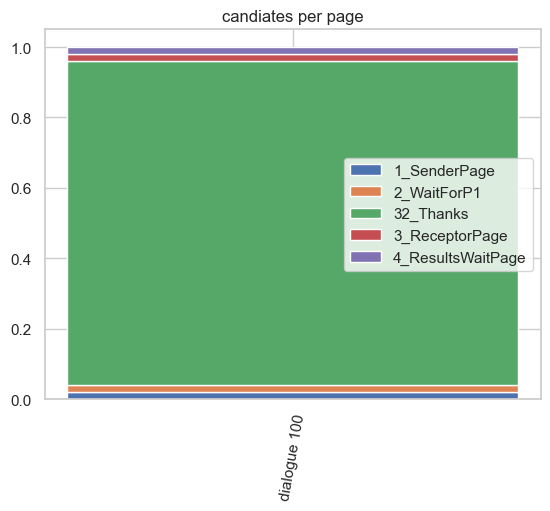

In [ ]:
bottom=[]

for p in page_anal.columns:
    if len(bottom) == 0 :
        plt.bar(page_anal.index, page_anal[p], label=p)
        bottom=page_anal[p]
    else:
        plt.bar(page_anal.index, page_anal[p], bottom = bottom , label=p)
        bottom=page_anal[p] + bottom
        

x_lab=[nice_session_label(l) for l in page_anal.index]
x_pos= np.arange(len(page_anal))
plt.legend()
plt.title('candiates per page')
plt.xticks(x_pos, x_lab ,rotation=80)
plt.savefig(figs_folder+"tmp.png", format="png", bbox_inches="tight")
plt.show()

In [ ]:

df.columns

Index(['receiver_response', 'final_payoff', 'Name', 'Gender', 'Age',
       'split_amount', 'subsession_id', 'round_number', 'id_in_group', 'id',
       '_vars', 'config', 'label', 'code', 'mturk_HITId', 'mturk_HITGroupId',
       'is_mturk', 'mturk_use_sandbox', 'mturk_expiration', 'mturk_qual_id',
       'archived', 'comment', '_anonymous_code', 'is_demo',
       '_admin_report_app_names', '_admin_report_num_rounds',
       'num_participants', '_created', 'id_2', '_vars_2', 'session_id',
       'label_2', 'id_in_session', 'payoff', 'time_started_utc',
       'mturk_assignment_id', 'mturk_worker_id', '_index_in_pages',
       '_monitor_note', 'code_2', '_session_code', 'visited',
       '_last_page_timestamp', '_last_request_timestamp', 'is_on_wait_page',
       '_current_page_name', '_current_app_name', '_round_number',
       '_current_form_page_url', '_max_page_index', '_is_bot',
       'is_browser_bot', '_timeout_expiration_time', '_timeout_page_index',
       '_gbat_is_connected'

In [ ]:
df

,receiver_response,final_payoff,Name,Gender,Age,split_amount,subsession_id,round_number,id_in_group,id,...,is_browser_bot,_timeout_expiration_time,_timeout_page_index,_gbat_is_connected,_gbat_tab_hidden,_gbat_page_index,_gbat_grouped,full,session.code,last_page
0,NaN,None,None,None,NaN,100,174,1,1,305,...,1,None,1.0,0,0,None,None,False,98ro6ly1,4_ResultsWaitPage
341,1.0,100,None,None,NaN,100,174,4,2,305,...,1,None,31.0,0,0,None,None,True,98ro6ly1,32_Thanks
340,NaN,100,None,None,NaN,100,174,4,1,305,...,1,None,31.0,0,0,None,None,True,98ro6ly1,32_Thanks
339,1.0,110,None,None,NaN,100,174,4,2,305,...,1,None,31.0,0,0,None,None,True,98ro6ly1,32_Thanks
338,NaN,90,None,None,NaN,100,174,4,1,305,...,1,None,31.0,0,0,None,None,True,98ro6ly1,32_Thanks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.0,40,None,None,NaN,100,174,2,2,305,...,1,None,31.0,0,0,None,None,True,98ro6ly1,32_Thanks
158,NaN,60,None,None,NaN,100,174,2,1,305,...,1,None,31.0,0,0,None,None,True,98ro6ly1,32_Thanks
157,1.0,120,None,None,NaN,100,174,2,2,305,...,1,None,31.0,0,0,None,None,True,98ro6ly1,32_Thanks
170,NaN,40,None,None,NaN,100,174,2,1,305,...,1,None,31.0,0,0,None,None,True,98ro6ly1,32_Thanks


In [ ]:
df['split_amount_num']= pd.to_numeric(df['split_amount'])

In [ ]:
df['sub_session_str']=[str(v) for v in df['subsession_id']]
df['round_number_str']=[str(v) for v in df[ 'round_number']]
proposer_df = df[df['id_in_group']==2]
pd.pivot_table(proposer_df,index='id_in_session',columns='round_number_str',values='split_amount_num',dropna=True,aggfunc='mean')
#round_df=pd.crosstab(index=df['subsession_id'],columns=df['_round_number'],values=df['split_amount'],aggfunc='mean')


round_number_str,1,2,3,4,5
id_in_session,,,,,
2,100,100,100,100,100
4,100,100,100,100,100
6,100,100,100,100,100
8,100,100,100,100,100
10,100,100,100,100,100
12,100,100,100,100,100
14,100,100,100,100,100
16,100,100,100,100,100
18,100,100,100,100,100


In [ ]:
sum_by_session=all_app.groupby('session.code')[num_cols].mean()
sum_by_session.transpose().plot.bar()

NameError: name 'num_cols' is not defined

In [ ]:
def clean_cov_mat(data,cols=None):
    if cols is None :
        cols= data.columns
    cov_mat={}
    for cx in cols:
        cov_matx={}
        for cy in cols:
    
            if cx==cy :
                cov_tab=1
            else:
                x= data[cx][(-pd.isna(data[cx]))&((-pd.isna(data[cy])))]
                y= data[cy][(-pd.isna(data[cx]))&((-pd.isna(data[cy])))]    
               
                res=np.corrcoef(x,y)     
            
                cov_tab=res[1][0]
            cov_matx[cy]=cov_tab
        cov_mat[cx]=cov_matx
    return pd.DataFrame.from_dict(cov_mat)

In [ ]:
def short_col_names(cols):
    new_cols=[]
    for i,n in enumerate(cols):
        if '_' in n:
            nn = ' '.join(n.split('_')[:-1])
        else :
            nn= n

        new_cols.append(str(i)+":"+nn)
    return new_cols
def color_map (cov_mat_df,interval=(-1,1),title="",ax=None):
    if ax is None :
        ax=plt
        use_plt=True
    else :
        use_plt=False
    
    ax.imshow(cov_mat_df,vmax=interval[1],vmin=interval[0], cmap='bwr')
   
    ax.grid(None)
    if use_plt:
        plt.title(title)
        plt.colorbar()
        plt.xticks(range(len(cov_mat_df.index)),short_col_names(cov_mat_df.index), rotation=90)
        plt.yticks(range(len(cov_mat_df.columns)),short_col_names(cov_mat_df.columns))
        plt.show()
        
    else :
        ax.set_title(title)
        
  


color_map(cov_mat_df,title='covar all sessions')



In [ ]:
def quick_p(x,y):
    if len(set(x))<2 :
        return 1
    x = sm.add_constant(x)
    model= sm.OLS(y,x).fit()

    T_test =model.t_test([0,1]) 
                
    p_tab=float(T_test.pvalue)
    return(p_tab)
def quick_e(x,y):
    if len(set(x))<2 :
        return 0
    x = sm.add_constant(x)
    model= sm.OLS(y,x).fit()
    T_test =model.t_test([0,1]) 
                
    p_tab=float(T_test.effect)
    return(p_tab)
def quick_correl(x,y):
    
    cx= x[(~pd.isna(x))&((~pd.isna(y)))]
    cy= y[(~pd.isna(x))&((~pd.isna(y)))]    
    if len(set(cx))<2 or len(set(cy))<2 :
        return 0    
    res=np.corrcoef(cx,cy)     
            
    cov_tab=res[1][0]
    return cov_tab 

In [ ]:
def clean_tab(data,f,cols):
    p_mat={}

    for cx in cols:
        p_matx={}
        for cy in cols:

                x= data[cx][(~pd.isna(data[cx]))&((~pd.isna(data[cy])))]
                y= data[cy][(~pd.isna(data[cx]))&((~pd.isna(data[cy])))]  
                
                p_tab = f(np.float64(x),np.float64(y))
                p_matx[cy]=p_tab
        p_mat[cx]=p_matx
    return pd.DataFrame.from_dict(p_mat)



In [ ]:
correl_anal={}
func_list_dict = {'p':quick_p,'e':quick_e,'c':quick_correl}
for s in sessions_and_orig_list :
    print(s)
    sub_data=  bot_and_orig_df[bot_and_orig_df['session.code']==s]
    res_d = {}
    correl_anal[s]=res_d
    for nf, f in func_list_dict.items():
        res_d[nf]=  clean_tab(data=sub_data,f=f,cols=common_num_col)

In [ ]:
color_map(correl_anal['original']['p'],title='p of t-test original',interval=(0,0.05))


p_mat_orig_df = clean_tab(data=original_df,f=quick_p,cols=common_num_col)
e_mat_orig_df = clean_tab(data=original_df,f=quick_e,cols=common_num_col)
correl_anal['original']={'p':p_mat_orig_df,'e':e_mat_orig_df}


for g in correl_anal:
    color_map(correl_anal[g]['p'],interval=(0,.1),title =f'p test for {g} {sessions_dict.get(g,"")} ')


In [ ]:
def count_mat_below(m,l):
    n = len(m)
    c=0
    for i in range(1,n):
        
        for j in range(i):
            
            if m.iloc[i,j]<l:
                c+=1
    return c

In [ ]:
def correl_by_session(correl_anal, nb_line = 4,value=['e','effect'],interval=(-0.5,0.5)):

    n=len(correl_anal)
    nb_by_line = n//nb_line +1
    fig, ax_tab = plt.subplots(nb_by_line, nb_line,sharex=True)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    fig.suptitle(f"{value[1]} in T-test for")
    sessions_nice_order = list(correl_anal.keys())
    sessions_nice_order.sort(key=lambda x: nice_session_label(x),reverse=True)
    for i,g in enumerate(sessions_nice_order):
       
        ax=ax_tab[i//nb_line , i%nb_line ]
        color_map(correl_anal[g][value[0]],interval=interval,title =f' {nice_session_label(g)} ',ax=ax)
    plt.savefig(figs_folder+f"corel_anal_matrix_{value[0]}.png", format="png", bbox_inches="tight")
    
correl_by_session(correl_anal, nb_line = 4)

In [ ]:
correl_by_session(correl_anal, nb_line = 4,value=['p','p-value'],interval=(0,0.05))

In [ ]:
correl_by_session(correl_anal, nb_line = 4,value=['c','correl coef'])

In [ ]:
sign_pos_effect={s : ((correl_anal[s]['e']>0)  & (correl_anal[s]['p']<0.01  ))for s  in correl_anal}
sign_neg_effect={s : ((correl_anal[s]['e']<0)  & (correl_anal[s]['p']<0.01  ))for s  in correl_anal}
sign_effect ={s : (sign_pos_effect[s]+0)- (sign_neg_effect[s]+0 )  for s  in correl_anal}
((sign_effect[s]==sign_effect['original']) &(sign_effect[s]!=0)  ).sum().sum()

In [ ]:
nb_good_tab=pd.DataFrame.from_dict({s:{'nice_session':nice_session_label( s) ,'good_neg':  ((correl_anal[s]['e']<0)  & (correl_anal['original']['e']<0  )).sum().sum()} for s  in correl_anal}).transpose()
nb_good_tab['good_pos']= [((correl_anal[s]['e']>0)  & (correl_anal['original']['e']>0  )).sum().sum() for s  in correl_anal]
nb_good_tab['tot_goo_side']=nb_good_tab['good_neg']+nb_good_tab['good_pos']
nb_good_tab['good_p_001']= [(correl_anal[s]['p']<0.01).sum().sum()    for s  in correl_anal]

nb_good_tab['replic_succ']= [((sign_effect[s]==sign_effect['original']) &(sign_effect[s]!=0)  ).sum().sum() for s  in correl_anal]
nb_good_tab['haluci']= nb_good_tab['good_p_001'] - nb_good_tab['replic_succ']

nb_good_tab.sort_values('replic_succ')


In [ ]:
nb_good_tab.sort_values('replic_succ')[['replic_succ','haluci','nice_session']].set_index('nice_session').plot.barh()
plt.title('Number of succesfull replications')
plt.savefig(figs_folder+"good_repli_by_session.png")

In [ ]:
all_app[num_cols+['influence_type']].groupby('influence_type').mean()

In [ ]:
sum_tab= pd.crosstab(index=bot_and_orig_df['influence_type'],columns=bot_and_orig_df['session.code'],values=bot_and_orig_df['future_influence_society_treated_num'],aggfunc='mean')

sum_tab=sum_tab.loc[['B','I','H']]
sum_tab.columns=[nice_session_label(c) for c in sum_tab.columns]
sum_tab.transpose().sort_index(ascending=False).plot.bar(title='future_influence_society')
plt.savefig(figs_folder+"BIH_Treatment_society.png")

In [ ]:
sum_tab= pd.crosstab(index=bot_and_orig_df['influence_type'],columns=bot_and_orig_df['session.code'],values=bot_and_orig_df['future_like_you_treated_num'],aggfunc='mean')

sum_tab=sum_tab.loc[['B','I','H']]
sum_tab.columns=[nice_session_label(c) for c in sum_tab.columns]
sum_tab.transpose().sort_index(ascending=False).plot.bar(title='future_like_you')
plt.savefig(figs_folder+"BIH_Treatment_like_you.png")

## color map by treatment

In [ ]:
def histo_by_treatment_and_session(data,c,treatment='influence_type',order=['B','I','H'],type="BP"):
    slist = list(set(data['nice_session']))
    slist.sort(reverse=True)
    axn = 6 
    nb_line = 1 
    n=len(slist)
    fig, ax_tab = plt.subplots(nb_line,n,sharex=True,sharey=True)
    fig.set_figheight(6)
    fig.set_figwidth(12)
    fig.suptitle(f"{c} by {treatment}")
    data['treat']= [clean_to_str(c) for c in data[treatment]]
    for i,s in enumerate(slist):
        ax=ax_tab[i%n ]
        if 'B' in type :
            sns.boxplot(x='treat',y= c,data=data[data['nice_session']==s] ,order=order,ax=ax)
        if 'P' in type :
            point_data= data[data['nice_session']==s].groupby(['treat',c]).count()
            
            sns.scatterplot(x='treat', y=c,size='session.code', 
                    data=point_data.loc[order],sizes=(40,400), 
                    alpha=.5,hue='treat',ax=ax)
        if 'H' in type :
            sns.histplot(y=c,x='treat',data=data[data['nice_session']==s] ,ax=ax, discrete=(True, True))
        
        ax.legend([],[], frameon=False)
        ax.set(xlabel=None)
        ax.set(ylabel=None)
        ax.set_title(s.replace(' ','\n'))
    plt.subplots_adjust(wspace=0.1,hspace=0.2,left=0,top=0.85,right=1,bottom=0.1)   
    plt.savefig(figs_folder+"treatmenh_"+treatment+"_col_"+c+".png", format="png", bbox_inches="tight")
    plt.show()
histo_by_treatment_and_session(bot_and_orig_df, 'future_like_you_treated_num',type='PH')

In [ ]:
def box_by_treatment_and_session(data,c,treatment='influence_type',order=['B','I','H'],type="BP"):
    slist = list(set(data['nice_session']))
    slist.sort(reverse=True)
    axn = 6 
    nb_line = 1 
    n=len(slist)
    fig, ax_tab = plt.subplots(nb_line,n,sharex=True,sharey=True)
    fig.set_figheight(6)
    fig.set_figwidth(12)
    fig.suptitle(f"{c} by {treatment}")
    data['treat']= [clean_to_str(c) for c in data[treatment]]
    for i,s in enumerate(slist):
        ax=ax_tab[i%n ]
        
        if 'B' in type :
            sns.boxplot(x='treat',y= c,data=data[data['nice_session']==s] ,order=order,ax=ax)
        if 'P' in type :
            point_data= data[data['nice_session']==s].groupby(['treat',c]).count()
            
            sns.scatterplot(x='treat', y=c,size='session.code', 
                    data=point_data.loc[order],sizes=(40,400), 
                    alpha=.5,hue='treat',ax=ax)
        
        ax.legend([],[], frameon=False)
        ax.set(xlabel=None)
        ax.set(ylabel=None)
        ax.set_title(s.replace(' ','\n'))
    plt.subplots_adjust(wspace=0.1,hspace=0.2,left=0,top=0.85,right=1,bottom=0.1)
    plt.savefig(figs_folder+"treatment_"+treatment+"_col_"+c+".png", format="png", bbox_inches="tight")
    plt.show()
box_by_treatment_and_session(bot_and_orig_df, 'future_like_you_treated_num')

In [ ]:
histo_by_treatment_and_session(bot_and_orig_df, 'future_like_you_treated_num',type='PH')
histo_by_treatment_and_session(bot_and_orig_df, 'future_influence_society_treated_num',type='PH')
histo_by_treatment_and_session(bot_and_orig_df, 'influence_like_you_num',type='PH')
histo_by_treatment_and_session(bot_and_orig_df, 'influence_society_num',type='PH')


In [ ]:
histo_by_treatment_and_session(bot_and_orig_df, 'future_influence_society_treated_num',treatment='time_frame_past',type='PH',order=['15','75'])
histo_by_treatment_and_session(bot_and_orig_df, 'future_like_you_treated_num',treatment='time_frame_past',type='PH',order=['15','75'])

In [ ]:
def plt_reg_col(data,cols):
    cols_means=data.groupby('session.code').mean(numeric_only=True)[cols].transpose()
    for c in sessions :
        sns.scatterplot(y=c, x=cols_means["original"],
                        data=cols_means, 
                        alpha=.5)
        sns.regplot(data=cols_means, x= "original", y=c)
    plt.legend([],[], frameon=False)
    plt.savefig(figs_folder+"tmp"+str(len(cols))+".png", format="png", bbox_inches="tight")
    plt.show()
    
plt_reg_col(bot_and_orig_df,cols=cols_analyse)

In [ ]:
sns.histplot(x=cols_analyse[3],data=bot_and_orig_df[~pd.isna(bot_and_orig_df[cols_analyse[3]])],discrete=(True, True),)

In [ ]:
def box_cols_by_session(data,cols=["future_influence_society_treated_num","future_like_you_treated_num"], nb_line = 4,type='PH'):

 
    n=len(cols)
    nb_by_line = n//nb_line
    fig, ax_tab = plt.subplots(nb_by_line, nb_line,sharex=True)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    fig.suptitle("Compared distribution of answers")
    sessions_nice_order = list(set(data['nice_session']))
    sessions_nice_order.sort(reverse=True)
    for i,c in enumerate(cols):

        ax=ax_tab[i//nb_line , i%nb_line ]
        if 'B' in type :
            sns.boxplot(x='nice_session',y= c,data=data ,ax=ax,order = sessions_nice_order)
        point_data= pd.crosstab(index=bot_and_orig_df[c],columns=bot_and_orig_df['nice_session'])

        if 'P' in type :
            sns.scatterplot(x="nice_session", y=c,size='session.code', 
                    data=bot_and_orig_df.groupby(['nice_session',c]).count().sort_index(ascending=False),sizes=(40,400), 
                    alpha=.5,hue="nice_session",ax=ax)
        if 'H' in type :
            sns.histplot(y=c,x='session.code',data=bot_and_orig_df[~pd.isna(bot_and_orig_df[c])],discrete=(True, True) ,
                         ax=ax,stat='proportion')
        ax.set_title(c)
        ax.set(xlabel=None)
        ax.set(ylabel=None)
        ax.legend([],[], frameon=False)
        ax.tick_params(labelrotation=80)
    plt.savefig(figs_folder+"cols_by_sessions_col_"+str(len(cols))+".png", format="png", bbox_inches="tight")
    plt.show()
box_cols_by_session(bot_and_orig_df,cols=cols_analyse,type='H')


## check profile data

In [ ]:
col_prof = ['sex_num', 'educ_num', 'age',  'political_aff_num']

In [ ]:
box_cols_by_session(bot_and_orig_df,cols=col_prof,nb_line=2)

In [ ]:
original_df['sex_num']

In [ ]:
res_all_col = {}
res_all_col_tabs=[]
decode_profile_col_dict={'educ_num':{4:3,5:4,6:5}}

for i,l in all_app.iterrows()  :
        part_code = l['code_2']
        caseid = session_participant_dict[l['session.code']][part_code]
        l_orig = original_df[original_df['caseid']==caseid].iloc[0]
        for  c in col_prof :
            orig_value = l_orig[c]
            if c in decode_profile_col_dict :
                orig_value = decode_profile_col_dict[c].get(orig_value,orig_value) 
            if not(c in res_all_col) :
                res_all_col[c]=dict()
            
            d=res_all_col[c]
            s= l['session.code'] 
            if s not in d :
                  d[s] = {'good': 0 , 'zero': 0, 'diff':0}
            if l[c] == orig_value :
                d[s]['good'] += 1 
            elif  l[c] == 0 or pd.isna(l[c]):
                d[s]['zero'] += 1
            else :
                  d[s]['diff']+=1
            res_all_col[c] = d    
#                  d = {'good':sum(tab[s]==tab['orig_decode']), 'zero':sum(tab[s]==0), 'diff':sum(tab[s]!=tab['orig_decode']) - sum(tab[s]==0)}

pd.DataFrame.from_dict(res_all_col)

In [ ]:
res_pct={}   
for j,c in res_all_col.items() :
    resl={}
    for i,d in c.items() : 
          resl[nice_session_label(i)] = d['good'] / ( d['good']+d['diff'])
    res_pct[j]=resl
pd.DataFrame.from_dict(res_pct)
            

In [ ]:
pd.DataFrame.from_dict(res_pct).plot.bar()
            

In [ ]:
tab= pd.crosstab(index=all_app['id_in_session']-1, columns=all_app['session.code'],values=all_app['educ_num'],aggfunc='sum' )
tab['original']=original_df['educ_num']
tab.iloc[range(28,35)]

In [ ]:
tab= pd.crosstab(index=all_app['id_in_session']-1, columns=all_app['session.code'],values=all_app['educ'],aggfunc='sum' )
tab['original']=ref_profile_df['educ']
tab.iloc[range(28,35)]

In [ ]:
c='educ'
educ_tab = pd.DataFrame.from_dict([[v[1],ref_profile_df['educ'][v[0]-1],
                                    original_df['educ_num'][v[0]-1],
                                    str(original_df['educ_num'][v[0]-1])+'-'+ ref_profile_df['educ'][v[0]-1]  ]
                                    for i,v in  all_app[['id_in_session',c] ].iterrows()])
educ_tab.columns=['bot','orig','orig_num','label']
educ_tab

In [ ]:
import scipy.stats as stats

In [ ]:
d=original_df 
f,p=stats.f_oneway(d[d['influence_type']=='B']['future_like_you_treated_num'].dropna(),d[d['influence_type']=='H']['future_like_you_treated_num'].dropna())
mean_B= d[d['influence_type']=='B']['future_like_you_treated_num'].dropna().mean()
mean_H= d[d['influence_type']=='H']['future_like_you_treated_num'].dropna().mean()

res1={'F':f,'p':p,'mean B':mean_B,
                            'mean H':mean_H,'diff':mean_H-mean_B}
res1

In [ ]:
stats.f_oneway(original_df[original_df['influence_type']=='B']['future_like_you_treated_num'], original_df[original_df['influence_type']=='I']['future_like_you_treated_num'])

In [ ]:
stats.f_oneway(original_df[original_df['influence_type']=='B']['future_like_you_treated_num'], original_df[original_df['influence_type']=='H']['future_like_you_treated_num'])

In [ ]:
set(raw_original_df['IUA155a'])

In [ ]:
def f_test_couple(treatment_col,target_col,data,s):
    d=data[data['session.code']==s]
    values = list(set(d[treatment_col]))
    fp=list()
    for i1,v1 in enumerate(values):
        for v2 in values[i1+1:] :
            f,p=stats.f_oneway(d[d[treatment_col]==v1][target_col].dropna(),
                        d[d[treatment_col]==v2][target_col].dropna())
                               
            mean_1= d[d[treatment_col]==v1][target_col].dropna().mean()
            mean_2= d[d[treatment_col]==v2][target_col].dropna().mean()
            
            fp.append({'v1':v1,'v2':v2,'session':nice_session_label(s),'F':round(f,2),'p':round(p,5),
                       'mean 1':mean_1,'mean 2':mean_2,'diff':mean_2-mean_1})
    
    return fp
